In [32]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip  # EN COLAB
# !pip install --user pandas-profiling[notebook]  # NOTEBOOK PERSONAL

## Dataset
En esta notebook usaremos un dataset simple para poder ver en detalle cada paso. Una alternativa un poquito mas compleja que Iris es el "dataset de los pingüinos".

https://github.com/allisonhorst/palmerpenguins

In [33]:
df = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
df

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [35]:
df.tail()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [36]:
print(df.dtypes)

species_short         object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [37]:
# Descripción de los varlores numéricos
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


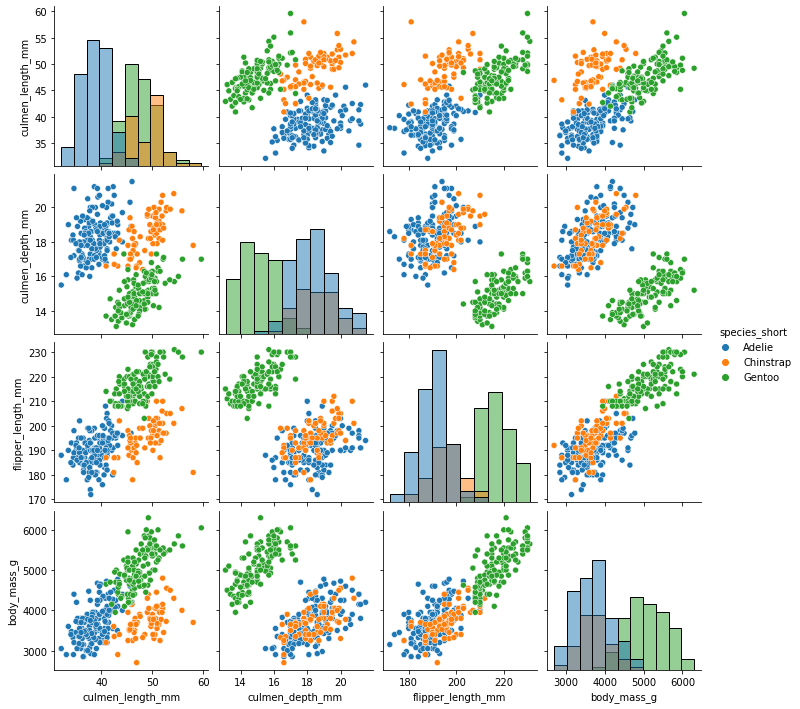

In [38]:
sns.pairplot(df, hue="species_short", diag_kind="hist")

In [40]:
from pandas_profiling import ProfileReport

#ProfileReport(df, title="Analisis exploratorio inicial", minimal=True)  # Reporte minimo
ProfileReport(df, title="Analisis exploratorio inicial", interactions={"targets": ["species_short"]})

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
# Convertimos las variables categóricas a numéricas (en este caso todas son 
# categóricas no ordinales)

# Las transformaciones se aplican por columna,  hay que diferenciar cada tipo
cat_columns = [c for c in df.columns if df[c].dtype == object]
print("cat", cat_columns)

# label_column = ["species_short"]
# cat_columns = [c for c in df.columns if df[c].dtype == object and c not in label_column] 


num_columns = [c for c in df.columns if df[c].dtype in [int, float]]
#num_columns = [c for c in df.columns if df not in cat_columns]
print("num", num_columns)

cat ['species_short', 'island', 'sex']
num ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [42]:
df["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

En agrupamiento usualmente no se requieren las etiquetas, pero si estan pueden aportar información. En este caso la trataremos como una variable categórica más (por ahora). 

Tener en cuenta que hay formas más convenientes de convertir las etiquetas a valores numéricos para clasificación (LabelEncoder). La diferencia con OneHotEncoder es que se mantiene un vector de una dimensión (en vez de hacer una columna por cada clase).

Usar pipelines tiene como ventaja:
- El código queda encapusulado
- Es legible y reproducible
- Ayuda a evitar problemas de "filtrado de particiones" (por ejemplo, que usemos los datos de test para ajustar algun proceso)



In [44]:
# Podemos definir un pipeline para cada tipo de dato (o para columnas en particular). Luego con el columnTransform se aplica por columna 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer


#proc_pipeline = ColumnTransformer(transformers=[("cat_processor", OneHotEncoder(), cat_columns)], 
#                                  sparse_threshold=0)
proc_pipeline = ColumnTransformer(transformers=[("Variables categóricas", OneHotEncoder(sparse=False), make_column_selector(dtype_exclude=np.number)),
                                                ("El resto", "passthrough", make_column_selector(dtype_include=np.number))
                                                ])

from sklearn import set_config
set_config(display='diagram')

proc_pipeline

ColumnTransformer(transformers=[('Variables categóricas',
                                 OneHotEncoder(sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8bce48eaf0>),
                                ('El resto', 'passthrough',
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8bce48e070>)])

In [45]:
dft = pd.DataFrame(proc_pipeline.fit_transform(df))
dft.columns = proc_pipeline.get_feature_names()
dft
 

,Variables categóricas__x0_Adelie,Variables categóricas__x0_Chinstrap,Variables categóricas__x0_Gentoo,Variables categóricas__x1_Biscoe,Variables categóricas__x1_Dream,Variables categóricas__x1_Torgersen,Variables categóricas__x2_.,Variables categóricas__x2_FEMALE,Variables categóricas__x2_MALE,Variables categóricas__x2_nan,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,39.1,18.7,181.0,3750.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,39.5,17.4,186.0,3800.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,40.3,18.0,195.0,3250.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,36.7,19.3,193.0,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
340,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,46.8,14.3,215.0,4850.0
341,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,50.4,15.7,222.0,5750.0
342,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,45.2,14.8,212.0,5200.0


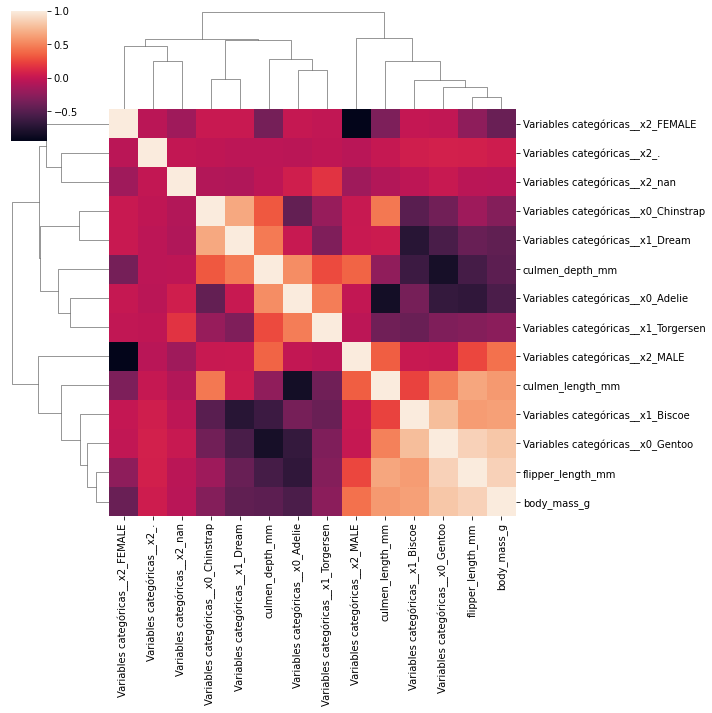

In [46]:
from seaborn import clustermap

clustermap(dft.corr())

## Limpieza y transformación de datos

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer

#cat_processor = Pipeline([("Reemplazo de NA", SimpleImputer(strategy="most_frequent")), 
#                          ("one-hot encoder",OneHotEncoder(sparse=False))])
#num_processor = Pipeline([("Reemplazo de NA", SimpleImputer(strategy="mean"))])


def remove_dot(x):
    x["sex"].replace(".", np.nan, inplace=True)
    return x 

cat_processor = make_pipeline(*[FunctionTransformer(func=remove_dot), # hacemos nan la entrada "."
                                SimpleImputer(strategy="most_frequent"),
                                OneHotEncoder(sparse=False)])
num_processor = make_pipeline(*[SimpleImputer(strategy="mean"),
                                ])


processor = ColumnTransformer(transformers=[("Variables categóricas", cat_processor, make_column_selector(dtype_exclude=np.number)),
                                            ("Variables numéricas", num_processor, make_column_selector(dtype_include=np.number)),
                                           ],
                             #remainder = num_processor
                             )


processor = make_pipeline(*[processor, StandardScaler()])

from sklearn import set_config
set_config(display='diagram')
display(processor)

dft = pd.DataFrame(processor.fit_transform(df))
dft

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Variables categóricas',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function remove_dot at 0x7f8bcfec4940>)),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8bcfca8d30>),
                                                 ('Variables numéricas',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8bcfc88220>)])),
                ('standardscaler', StandardScaler())])

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.123903,-0.496364,-0.750757,-0.977008,-0.750757,2.369680,-0.960098,0.960098,-8.870812e-01,7.877425e-01,-1.422488,-0.565789
1,1.123903,-0.496364,-0.750757,-0.977008,-0.750757,2.369680,1.041561,-1.041561,-8.134940e-01,1.265563e-01,-1.065352,-0.503168
2,1.123903,-0.496364,-0.750757,-0.977008,-0.750757,2.369680,1.041561,-1.041561,-6.663195e-01,4.317192e-01,-0.422507,-1.192003
3,1.123903,-0.496364,-0.750757,-0.977008,-0.750757,2.369680,-0.960098,0.960098,-1.307172e-15,1.806927e-15,0.000000,0.000000
4,1.123903,-0.496364,-0.750757,-0.977008,-0.750757,2.369680,1.041561,-1.041561,-1.328605e+00,1.092905e+00,-0.565361,-0.941517
...,...,...,...,...,...,...,...,...,...,...,...,...
339,-0.889757,-0.496364,1.331989,1.023533,-0.750757,-0.421998,-0.960098,0.960098,-1.307172e-15,1.806927e-15,0.000000,0.000000
340,-0.889757,-0.496364,1.331989,1.023533,-0.750757,-0.421998,1.041561,-1.041561,5.294731e-01,-1.450118e+00,1.006038,0.811880
341,-0.889757,-0.496364,1.331989,1.023533,-0.750757,-0.421998,-0.960098,0.960098,1.191758e+00,-7.380718e-01,1.506028,1.939064
342,-0.889757,-0.496364,1.331989,1.023533,-0.750757,-0.421998,1.041561,-1.041561,2.351241e-01,-1.195816e+00,0.791756,1.250229


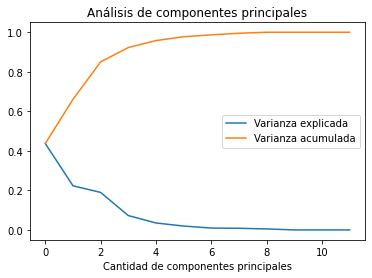

In [48]:
# ahora podríamos agregar un método de reducción de dimensionalidad (muy util si hay mucha correlación entre variables)
from sklearn.decomposition import PCA

# porcentaje de variabilidad explicada
pca = PCA(n_components=dft.shape[1]) 
pca.fit(dft)
    
plt.plot(pca.explained_variance_ratio_, label="Varianza explicada")
plt.plot(np.cumsum(pca.explained_variance_ratio_), label="Varianza acumulada")
plt.legend()
plt.xlabel("Cantidad de componentes principales")
plt.title("Análisis de componentes principales");

In [50]:
from sklearn.manifold import trustworthiness
pca = PCA(n_components=2) 
pca.fit(dft)
trustworthiness(dft, pca.transform(dft))

0.952671650055371

In [54]:
processor = make_pipeline(*[processor, PCA(n_components=4)])
processor

processor.fit_transform(df).shape

(344, 4)

## Agrupamiento

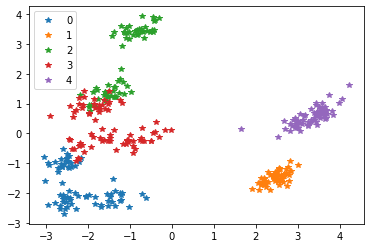

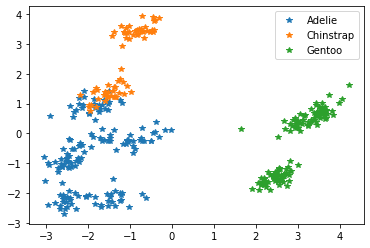

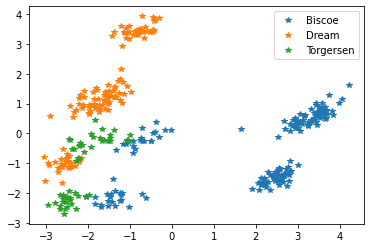

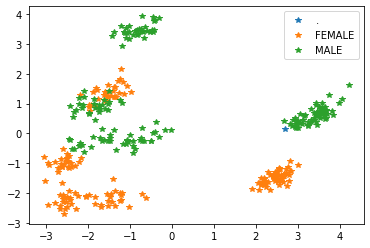

In [56]:
from sklearn.cluster import KMeans

dft = processor.fit_transform(df)
dft.shape

model = KMeans(n_clusters=5)

# en este caso fit_transform devuelve la distancia de cada punto al centroide (siempre revisar la documentación!)
# distances = model.fit_transform(dft)

clusters = model.fit_predict(dft)

for c in np.unique(clusters):
    ind = clusters == c
    plt.plot(dft[ind, 0], dft[ind, 1], "*", label=f"{c}")
    plt.legend()
    
plt.figure()
for l in np.unique(df["species_short"]):
    ind = df["species_short"] == l
    plt.plot(dft[ind, 0], dft[ind, 1], "*", label=f"{l}")
    plt.legend()
    
    
plt.figure()
for l in np.unique(df["island"]):
    ind = df["island"] == l
    plt.plot(dft[ind, 0], dft[ind, 1], "*", label=f"{l}")
    plt.legend()

plt.figure()

for l in np.unique(df["sex"].dropna()):
    ind = df["sex"] == l
    plt.plot(dft[ind, 0], dft[ind, 1], "*", label=f"{l}")
    plt.legend()


¿Que pasa si usamos solo las variables numéricas?

In [57]:
num_processor = make_pipeline(*[SimpleImputer(strategy="mean"),
                                StandardScaler()])


processor = ColumnTransformer(transformers=[("Variables numéricas", num_processor, make_column_selector(dtype_include=np.number)),
                                           ],
                             remainder = "drop" # Descartamos todas las variables que no sean tomadas por transformers
                             )


from sklearn import set_config
set_config(display='diagram')
display(processor)

dft = pd.DataFrame(processor.fit_transform(df))
dft

ColumnTransformer(transformers=[('Variables numéricas',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8bcf91b160>)])

,0,1,2,3
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003
3,-1.307172e-15,1.806927e-15,0.000000,0.000000
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517
...,...,...,...,...
339,-1.307172e-15,1.806927e-15,0.000000,0.000000
340,5.294731e-01,-1.450118e+00,1.006038,0.811880
341,1.191758e+00,-7.380718e-01,1.506028,1.939064
342,2.351241e-01,-1.195816e+00,0.791756,1.250229


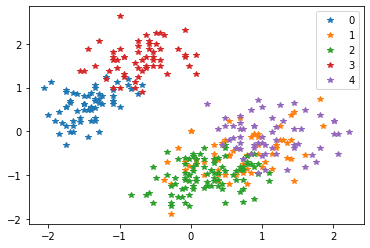

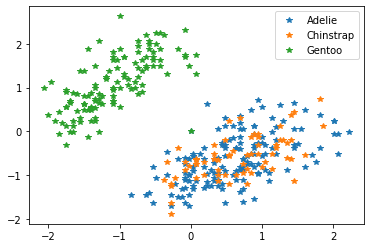

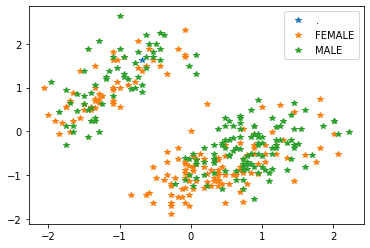

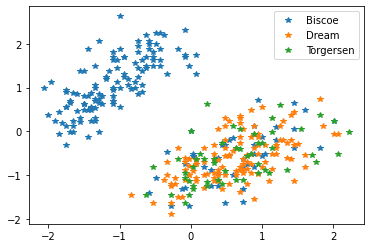

In [59]:
model = KMeans(n_clusters=5)

# en este caso fit_transform devuelve la distancia de cada punto al centroide (siempre revisar la documentación!)
# distances = model.fit_transform(dft)

clusters = model.fit_predict(dft)

x1, x2 = 1, 3
for c in np.unique(clusters):
    ind = clusters == c
    plt.plot(dft.loc[ind, x1], dft.loc[ind, x2], "*", label=f"{c}")
    plt.legend()
    
var = df["species_short"].dropna().values
plt.figure()
for c in np.unique(var):
    ind = np.where(var == c)[0]
    plt.plot(dft.iloc[ind, x1], dft.iloc[ind, x2], "*", label=f"{c}")
    plt.legend()

var = df["sex"].dropna().values
plt.figure()
for c in np.unique(var):
    ind = np.where(var == c)[0]
    plt.plot(dft.iloc[ind, x1], dft.iloc[ind, x2], "*", label=f"{c}")
    plt.legend()

var = df["island"].dropna().values
plt.figure()
for c in np.unique(var):
    ind = np.where(var == c)[0]
    plt.plot(dft.iloc[ind, x1], dft.iloc[ind, x2], "*", label=f"{c}")
    plt.legend()


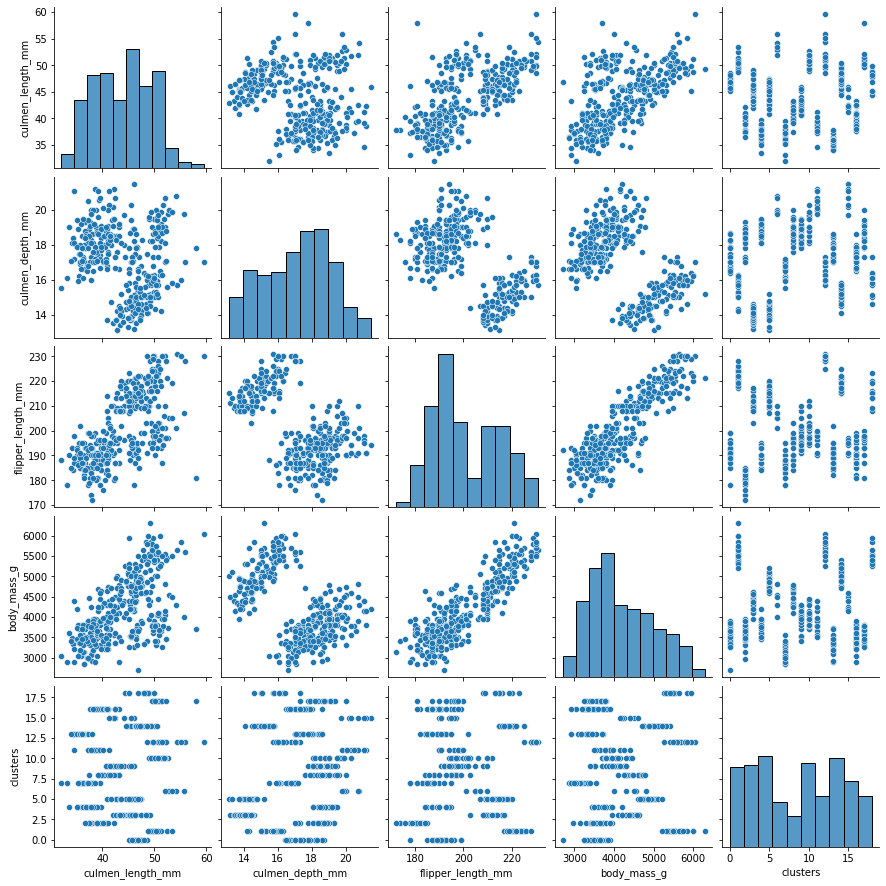

In [63]:
df["clusters"] = clusters
sns.pairplot(df)

Para tener una idea de cuantos clusters es mejor, podemos usar una medida objetiva


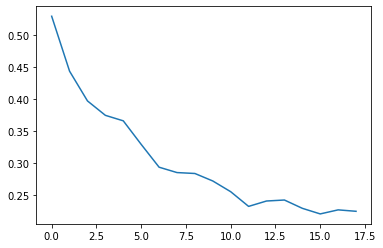

In [62]:
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 20):
    model = KMeans(n_clusters=k)
    clusters = model.fit_predict(dft)
    scores.append(silhouette_score(dft, clusters))
    
plt.plot(scores)


## Implementación de un pipeline para agrupamiento

Pasamos en limpio lo visto hasta ahora. Vamos a usar solo las variables numéricas (fenotipos de cada especie) y veremos cual es la mejor forma de agruparlos.

Cada elemento del pipeline es en definitiva un modelo que aprende parámetros de los datos, y sus hiperparámetros se pueden elegir en función de alguna métrica de interés. 
Si bien se podría pensar un esquema de validación cruzada, en general usamos las tecnicas no supervisadas para encontrar mejores representaciones/agrupamientos en todo el conjunto
de datos. 

In [64]:
results = []
for kmeans_k in [2, 5, 10]:
    for scale_data in [True, False]:
        
        num_steps = [SimpleImputer(strategy="mean")]
        if scale_data:
            num_steps.append(StandardScaler())
        
        num_processor = make_pipeline(*num_steps)

        col_processor = ColumnTransformer(transformers=[("Variables numéricas", num_processor, make_column_selector(dtype_include=np.number)),
                                               ],
                                 remainder = "drop" # Descartamos todas las variables que no sean tomadas por transformers
                                 )

        # Vamos a llamarlo pipeline en vez de processor porque ya no es solo preprocesar datos
        pipeline = make_pipeline(*[col_processor, KMeans(n_clusters=kmeans_k)])


        # Notar que acá lo que queremnos es tener un id de grupo para cada patrón, por eso usamos fit_predict()
        clusters = pipeline.fit_predict(df) 
        
        results.append([scale_data, kmeans_k, silhouette_score(col_processor.fit_transform(df), clusters)])
        
pd.DataFrame(results, columns=["scale_data", "kmeans_k", "siluette_score"])

,scale_data,kmeans_k,siluette_score
0,True,2,0.437517
1,False,2,0.626948
2,True,5,0.385762
3,False,5,0.544784
4,True,10,0.470084
5,False,10,0.543409
